# 실습: 수의 정확도, 오차
**강좌**: *수치해석*

**Due**: 2024/09/26

## Problem #1
$\cos(x)$ 과 $\sin(x)$ 함수는 Taylor expansion에 의해 다음과 같이 표현할 수 있다.

$$
\begin{align}
\cos x &= 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + ... \\
\sin x &= x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + ...
\end{align}
$$

여기서 $x$의 단위는 radian이다.

$x$가 5도 각도일 때 근사항의 갯수에 따른 절대오차, 참 상대오차, 근사 상대 오차를 구하고 이를 그래프로 표현하시오.

Tip) `np.deg2rad`, `np.rad2deg` 함수 참고할 것

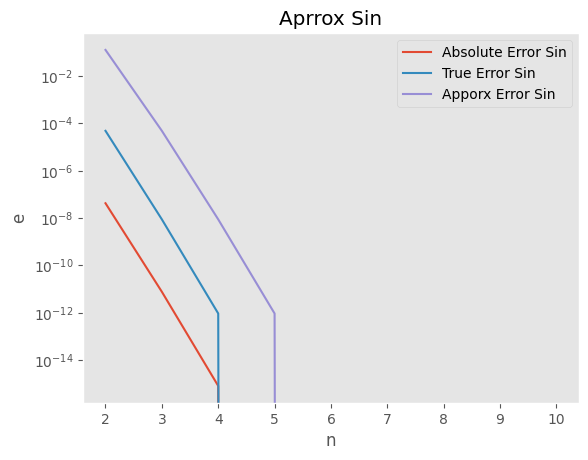

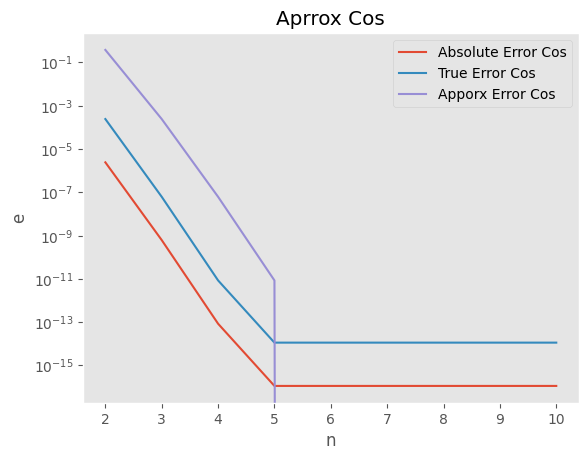

In [61]:
# Write your answer
import numpy as np
from matplotlib import pyplot as plt
x = np.deg2rad(5)
n = range(2,11)
exact_sin = lambda x : np.sin(x)
exact_cos = lambda x : np.cos(x)

def factorial(n) :
    fac = 1
    for i in range(1,n+1) :
        fac *= i 
    return fac

def approx_sin(x, n) :
    approx_sin = 0
    for i in range(0,n) :
        approx_sin += (x**(2*i+1))/factorial(2*i+1)*(-1)**i
    return approx_sin

def approx_cos(x, n) :
    approx_cos = 0 
    for i in range(0, n) :
        approx_cos += (x**(2*i))/factorial(2*i)*(-1)**(i)
    return approx_cos
#절대오차
abs_error_sin = []
abs_error_cos = []
for i in n :
    abs_error_sin_cal = abs(exact_sin(x) - approx_sin(x, i))
    abs_error_cos_cal = abs(exact_cos(x) - approx_cos(x, i))
    abs_error_sin.append(abs_error_sin_cal)
    abs_error_cos.append(abs_error_cos_cal)

#참 상대오차
t_error_sin = []
t_error_cos = []
for i in n :
    t_error_sin_cal = abs(exact_sin(x) - approx_sin(x, i))/abs(exact_sin(x))
    t_error_cos_cal = abs(exact_cos(x) - approx_cos(x, i))/abs(exact_cos(x))
    t_error_sin.append(t_error_sin_cal*100)
    t_error_cos.append(t_error_cos_cal*100)

#근사 상대오차
a_error_sin = []
a_error_cos = []
for i in n :
    a_error_sin_cal = abs(approx_sin(x, i)-approx_sin(x, i-1))/abs(approx_sin(x, i-1))
    a_error_cos_cal = abs(approx_cos(x, i)-approx_cos(x, i-1))/abs(approx_cos(x, i-1))
    a_error_sin.append(a_error_sin_cal*100)
    a_error_cos.append(a_error_cos_cal*100)

plt.style.use('ggplot')
plt.semilogy(n,abs_error_sin, label ='Absolute Error Sin')
plt.semilogy(n,t_error_sin, label ='True Error Sin')
plt.semilogy(n,a_error_sin, label ='Apporx Error Sin')
plt.xlabel('n')
plt.ylabel('e')
plt.title('Aprrox Sin')
plt.legend()
plt.grid()
plt.show()    

plt.semilogy(n,abs_error_cos, label ='Absolute Error Cos')
plt.semilogy(n,t_error_cos, label ='True Error Cos')
plt.semilogy(n,a_error_cos, label ='Apporx Error Cos')
plt.xlabel('n')
plt.ylabel('e')
plt.title('Aprrox Cos')
plt.legend()
plt.grid()
plt.show()    

## Problem #2
단정밀도 (np.float32) 대해서 머신 Epsilon을 구하고, 뺄샘의 무효화, Overflow, Underflow 상황을 만들어 보시오.

In [62]:
# Write your answer

# Machine epsilon
machine_epsilon = np.finfo(np.float32).eps
print(np.finfo(np.float32))
print(machine_epsilon)
# 뺄샘의 무효화
print(np.float32(0.5)-np.float32(0.49999999))
# Overflow
print(np.float32(3.4028235e+38)*10)
# Underflow
print(np.float32(1.4012985e-45)/10)

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
smallest_normal = 1.1754944e-38   smallest_subnormal = 1.4012985e-45
---------------------------------------------------------------

1.1920929e-07
0.0
inf
0.0


/var/folders/hw/1xcjmtrs1c31k9myf8c3p_ph0000gn/T/ipykernel_15149/1356902026.py:10: RuntimeWarning: overflow encountered in scalar multiply
  print(np.float32(3.4028235e+38)*10)


## Problem #3
$\sin(x)$ 를 $a=\pi/4$ 를 기준으로 Taylor series를 이용하여 근사식을 구하고, $[0, \pi/2]$ 구간에서 근사해와 이론해를 비교하시오. 전단오차의 크기를 확인하시오.

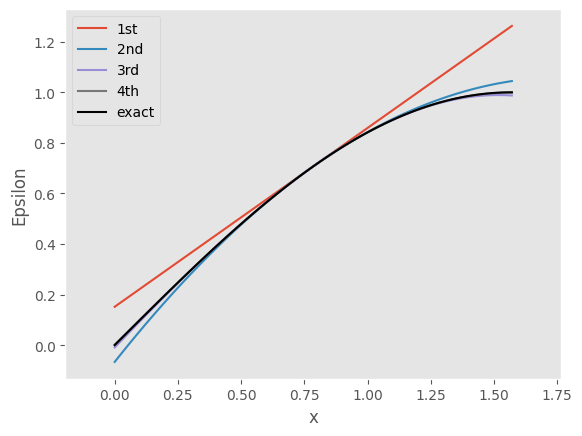

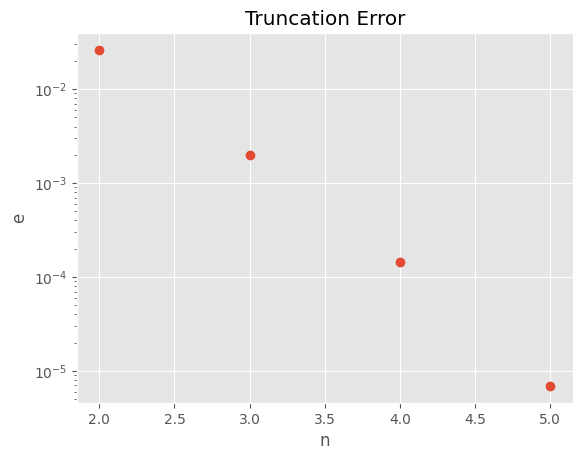

In [80]:
# Write your answer
interval_x = np.linspace(0,np.pi/2,101)
x_cal = np.pi/3
exact_sin = np.sin(x)
n = range(2,6)
truncation_error = []

def taylor_sin(n,x,a) :
    taylor_sin = 0
    sign_cos = 1
    sign_sin = 1
    for i in range(1,n+1) :
        if i % 2 == 1 :
            taylor_sin += sign_sin*np.sin(a)*((x-a)**(i-1))/factorial(i-1)
            sign_sin *= -1
        else :
            taylor_sin += sign_cos*np.cos(a)*((x-a)**(i-1))/factorial(i-1)
            sign_cos *= -1
    return taylor_sin

for i in n :
    approx = taylor_sin(i, interval_x, np.pi/4)
    truncation_error.append(abs(taylor_sin(i,x_cal,np.pi/4)-np.sin(x_cal)))
    plt.plot(interval_x, approx)
plt.plot(interval_x, np.sin(interval_x), color = 'black')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('Epsilon')
plt.legend(['1st','2nd','3rd','4th','exact'])
plt.grid()
plt.show()

plt.semilogy(n, truncation_error, marker ='o', linestyle = '')
plt.xlabel('n')
plt.ylabel('e')
plt.title('Truncation Error')
plt.grid(True)
plt.show() 



## Problem #4
Condition 수를 구하고 그 의미를 설명하시오.

(a) $f(x) = \sqrt{|x-1|} + 1$, $x=1.00001$

(b) $f(x) = \frac{\sin(x)}{\cos(x) + 1}$, $x=1.0001\pi$

In [ ]:
# Write your answer for (a)
import sympy as sp
from sympy.abc import x
x_cal = 1.00001
f = sp.sqrt(sp.Abs(x-1)) + 1 
df_dx = sp.diff(f,x)
f_val = f.evalf(subs={x: x_cal})
df_val = df_dx.evalf(subs={x: x_cal})

cond = abs(x_cal*df_val/f_val)
print(cond)
# 의미: 위 함수는 오차에 대해서 민감한 시스템이다. = ill-conditioned system


157.617035317084*Abs(Subs(Derivative(re(x), x), x, 1.00001))


In [ ]:
# Write your answer for (b)
x_cal = 1.0001*np.pi
f = sp.sin(x)/(sp.cos(x)+1)
df_dx = sp.diff(f,x)
f_val = f.evalf(subs={x: x_cal})
df_val = df_dx.evalf(subs={x: x_cal})

cond = abs(x_cal*df_val/f_val)
print(cond)
# 의미: 위 시스템보다 오차에 대해서 더 민감하면 이 시스템 또한 ill-conditioned system이다.

10001.0001645116
